## Piecewise Polynomial Approximation in 1D

This notes introduces the mathematical and computational framework for approximating continuous functions $f(x)$ using continuous piecewise linear functions. It is based on: 
- **Chapter 1**, *The Finite Element Method: Theory, Implementation, and Applications*, by Mats G. Larson and Fredrik Bengzon. 

---

### 1. Function Spaces

#### 1.1 The Space $P_1(I)$: Linear Polynomials

Let $I = [x_0, x_1]$ be a single interval.
* **Definition:** The space $P_1(I)$ is the vector space of all linear polynomials on $I$.
    $$P_1(I) = \{v(x) \mid v(x) = c_0 + c_1x, \ x \in I, \ c_0, c_1 \in \mathbb{R}\}$$
    This space has a dimension of 2.

* **Monomial Basis:** The set $\{1, x\}$ is a basis. Any $v \in P_1(I)$ can be determined by its values at $x_0$ and $x_1$, $v_0 = v(x_0)$ and $v_1 = v(x_1)$. This leads to a linear system for the coefficients $c_0, c_1$:
    $$
    \begin{pmatrix} 1 & x_0 \\ 1 & x_1 \end{pmatrix} \begin{pmatrix} c_0 \\ c_1 \end{pmatrix} = \begin{pmatrix} v_0 \\ v_1 
    \end{pmatrix}
    $$
    The system matrix is a **Vandermonde matrix** with determinant $x_1 - x_0 = h$ (the interval length). Since $h > 0$, a unique solution for $c_0, c_1$ always exists.

* **Nodal Basis (Lagrange Basis):** A more convenient basis is the **nodal basis** $\{\lambda_0, \lambda_1\} \subset P_1(I)$, defined by the property:
    $$\lambda_i(x_j) = \delta_{ij} = \begin{cases} 1 & \text{if } i = j \\ 0 & \text{if } i \neq j \end{cases}$$
    These basis functions are explicitly:
    $$\lambda_0(x) = \frac{x_1 - x}{x_1 - x_0} \quad \text{and} \quad \lambda_1(x) = \frac{x - x_0}{x_1 - x_0}$$
    Using this basis, any $v \in P_1(I)$ has a direct representation:
    $$v(x) = v(x_0)\lambda_0(x) + v(x_1)\lambda_1(x)$$

#### 1.2 The Space $V_h$: Continuous Piecewise Linear Functions

Let $I = [0, L]$ be partitioned by a **mesh** $\mathcal{T}_h = \{I_i\}_{i=1}^n$ of $n$ subintervals, defined by $n+1$ nodes $0 = x_0 < x_1 < ... < x_n = L$. Let $h_i = x_i - x_{i-1}$ and $h = \max_i h_i$.

* **Definition:** The space $V_h$ is the set of all continuous functions on $I$ that are linear on each subinterval $I_i$.
    $$V_h = \{v \in C^0(I) \mid v|_{I_i} \in P_1(I_i) \text{ for } i=1, ..., n\}$$
    This is a vector space. A function $v \in V_h$ is uniquely determined by its $n+1$ nodal values $\{v(x_i)\}_{i=0}^n$. Thus, $\text{dim}(V_h) = n+1$.

* **Basis ("Hat Functions"):** The standard basis for $V_h$ is the set of **hat functions** $\{\phi_i\}_{i=0}^n$.
    Each $\phi_i \in V_h$ is defined by the nodal property $\phi_i(x_j) = \delta_{ij}$.
    The explicit formula for an interior hat function $\phi_i(x)$ (for $i=1, ..., n-1$) is:
    $$
    \phi_i(x) = 
    \begin{cases} \frac{x - x_{i-1}}{h_i} & \text{if } x \in I_i= [x_{i-1}, x_i] \\ \frac{x_{i+1} - x}{h_{i+1}} & \text{if } x \in I_{i+1}=[x_i, x_{i+1}] \\ 0 & \text{otherwise} \end{cases}
    $$
    (The endpoint functions $\phi_0$ and $\phi_n$ are "half-hats").

* Any $v \in V_h$ can be written as a linear combination of these basis functions, with the coefficients being the nodal values:
    $$v(x) = \sum_{i=0}^n v(x_i)\phi_i(x)$$

---


### 2. Approximation Methods

We seek an approximation $f_h \in V_h$ for a given continuous function $f \in C^0(I)$.

#### 2.1 Interpolation

* **Definition:** The **linear interpolant** $\pi_h f \in V_h$ is defined as the function that matches $f$ at all nodes.
    $$\pi_h f(x_i) = f(x_i) \quad \text{for } i=0, ..., n$$
    Using the hat function basis, its formula is:
    $$\pi_h f(x) = \sum_{i=0}^n f(x_i)\phi_i(x)$$

* **Error Estimates:** We measure the approximation error using norms. The **$L_2$-norm** is defined as:
    $$||v||_{L_2(I)} = \left( \int_I v(x)^2 \ dx \right)^{1/2}$$
    **Proposition 1.2:** For a function $f$ with a continuous second derivative ($f \in C^2(I)$), the interpolation error is bounded by:
    $$||f - \pi_h f||_{L_2(I)} \le C h^2 ||f''||_{L_2(I)}$$
    where $C$ is a constant independent of the mesh size $h$. This shows the error converges **quadratically** as the mesh is refined.

#### 2.2 $L_2$-Projection

* **Definition:** We define the **$L_2$-inner product** for two functions $v, w$ as:
    $$(v, w) = \int_I v(x)w(x) \ dx$$
    The **$L_2$-projection** $P_h f \in V_h$ is the function that satisfies the **orthogonality condition**:
    $$(f - P_h f, v) = 0 \quad \forall v \in V_h$$
    This means the error $f - P_h f$ is orthogonal to the entire approximation space $V_h$.

* **Optimality (Theorem 1.1):** The $L_2$-projection is the **best possible approximation** in $V_h$ when measured by the $L_2$-norm.
    $$||f - P_h f||_{L_2(I)} = \min_{v \in V_h} ||f - v||_{L_2(I)}$$

* **Error Estimate (Theorem 1.2):** The $L_2$-projection has the same optimal convergence rate as interpolation:
    $$||f - P_h f||_{L_2(I)} \le C h^2 ||f''||_{L_2(I)}$$

---



### 3. Computation of the $L_2$-Projection

We must solve for $P_h f$.
1.  **Ansatz:** We seek $P_h f$ as an unknown linear combination of the basis functions. Let $\xi = [\xi_0, ..., \xi_n]^T$ be the vector of unknown coefficients:
    $$P_h f(x) = \sum_{j=0}^n \xi_j \phi_j(x)$$

2.  **Derivation of the Linear System:**
    We substitute this into the orthogonality condition $(f - P_h f, v) = 0$. Since this must hold for *all* $v \in V_h$, it must hold for each basis function $v = \phi_i$ ($i=0, ..., n$):
    $$(f - \sum_{j=0}^n \xi_j \phi_j, \phi_i) = 0 \quad \text{for } i=0, ..., n$$
    By the linearity of the inner product:
    $$(f, \phi_i) - \sum_{j=0}^n \xi_j (\phi_j, \phi_i) = 0$$
    Rearranging, we get a linear system for the $\xi_j$:
    $$\sum_{j=0}^n (\phi_i, \phi_j) \xi_j = (f, \phi_i) \quad \text{for } i=0, ..., n$$

3.  **Matrix Form $M\xi = b$:**
    This is a linear system of $n+1$ equations for the $n+1$ unknowns in $\xi$.
    * **$M$ (Mass Matrix):** $$M_{ij} = (\phi_i, \phi_j) = \int_I \phi_i(x) \phi_j(x) \ dx$$
    * **$b$ (Load Vector):** $$b_i = (f, \phi_i) = \int_I f(x) \phi_i(x) \ dx$$
    * **$\xi$ (Solution Vector):** $\xi_j$ are the coefficients of $P_h f$. Note: $\xi_j \neq f(x_j)$ in general.

---


### 4. Practical Implementation: Assembly

We build $M$ and $b$ using an **assembly** process, looping over each element $I_i = [x_{i-1}, x_i]$ (length $h_i$).

#### 4.1 Assembly of Mass Matrix $M$
On element $I_i$, the only non-zero basis functions are $\phi_{i-1}$ and $\phi_i$. Their restrictions to $I_i$ are just the local nodal basis functions:
* $\phi_{i-1}(x) = \frac{x_i - x}{h_i}$ (local form of $\phi_{i-1}$ on $I_i$)
* $\phi_{i}(x) = \frac{x - x_{i-1}}{h_i}$ (local form of $\phi_i$ on $I_i$)

We compute the 2x2 **local element mass matrix** $M^i$ by integrating these local functions over $I_i$:
$$M^i_{11} = \int_{I_i} \lambda_0^2 \ dx = \int_{x_{i-1}}^{x_i} \left(\frac{x_i - x}{h_i}\right)^2 \ dx = \frac{h_i}{3}$$
$$M^i_{12} = \int_{I_i} \lambda_0 \lambda_1 \ dx = \int_{x_{i-1}}^{x_i} \frac{(x_i - x)(x - x_{i-1})}{h_i^2} \ dx = \frac{h_i}{6}$$
$$M^i_{21} = M^i_{12} = \frac{h_i}{6}$$
$$M^i_{22} = \int_{I_i} \lambda_1^2 \ dx = \int_{x_{i-1}}^{x_i} \left(\frac{x - x_{i-1}}{h_i}\right)^2 \ dx = \frac{h_i}{3}$$

So, $$M^i = \frac{h_i}{6} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$$

**Assembly Algorithm:**
1.  Initialize a global $M = 0$.
2.  Loop $i = 1$ to $n$ (over all elements):
    * Compute $M^i$.
    * Add its entries to the global matrix:
        - $M_{i-1, i-1} \mathrel{+}= M^i_{11}$
        - $M_{i-1, i} \mathrel{+}= M^i_{12}$
        - $M_{i, i-1} \mathrel{+}= M^i_{21}$
        - $M_{i, i} \mathrel{+}= M^i_{22}$

The resulting global $M$ is symmetric, positive definite, and tridiagonal.

#### 4.2 Assembly of Load Vector $b$
We must compute $b_i = (f, \phi_i)$. These integrals are typically approximated using **numerical quadrature**.

Let's use the **Trapezoidal Rule** on each element $I_i$ for the **local element load vector** $b^i$.
$$b^i_1 = \int_{I_i} f(x) \lambda_0(x) \ dx \approx \frac{h_i}{2} [f(x_{i-1})\lambda_0(x_{i-1}) + f(x_i)\lambda_0(x_i)]$$
$$b^i_1 \approx \frac{h_i}{2} [f(x_{i-1}) \cdot 1 + f(x_i) \cdot 0] = \frac{h_i}{2} f(x_{i-1})$$

$$b^i_2 = \int_{I_i} f(x) \lambda_1(x) \ dx \approx \frac{h_i}{2} [f(x_{i-1})\lambda_1(x_{i-1}) + f(x_i)\lambda_1(x_i)]$$
$$b^i_2 \approx \frac{h_i}{2} [f(x_{i-1}) \cdot 0 + f(x_i) \cdot 1] = \frac{h_i}{2} f(x_i)$$

So, $$b^i \approx \frac{h_i}{2} \begin{bmatrix} f(x_{i-1}) \\ f(x_i) \end{bmatrix}$$

**Assembly Algorithm:**
1.  Initialize a global $b = 0$.
2.  Loop $i = 1$ to $n$ (over all elements):
    * Compute $b^i$ (using quadrature).
    * Add its entries to the global vector:
        - $b_{i-1} \mathrel{+}= b^i_1$
        - $b_i \mathrel{+}= b^i_2$

Finally, we solve the tridiagonal system $M\xi = b$ to find the coefficient vector $\xi$, which defines our approximation $P_h f$.

---

#### Practice Assignment 

Let $f(x) = 2x \sin (2\pi x) + 3$ be a function defined on the interval $I=[0,1]$.
Consider a uniform mesh of $I$ with $n=5$ subintervals, which has 6 nodes $\{x_i\}_{i=0}^5$.

Find:
1.  The continuous piecewise linear interpolant, $\pi_h f(x) = \sum_{i=0}^5 f(x_i)\phi_i(x)$.
2.  The $L_2$-projection, $P_h f(x)$, onto the same mesh.

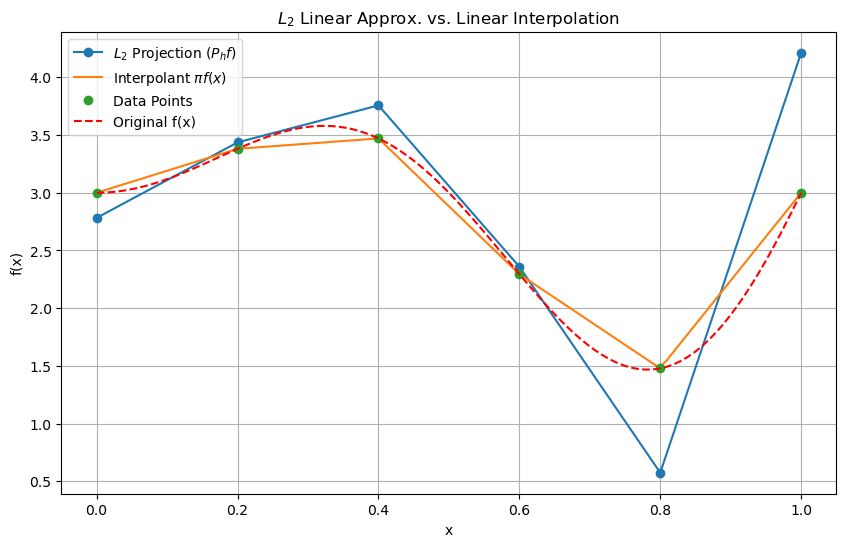

In [2]:
# Input data
n = 5  # number of subintervals
a, b = 0, 1
f = lambda x: 2*x*np.sin(2*np.pi*x) + 3

# nodal points and function values
x = np.linspace(a, b, n + 1)
f_vals = f(x) 

# L^2 projection
Pf = l2_projector_1d(x,f_vals,f)

# linear interpolation
xe = np.linspace(a, b, 100)
If = interpolant_1d(x,f_vals,xe)


# plot L^2 projection
plt.figure(figsize=(10, 6))
plt.plot(x, Pf, 'o-', label='$L_2$ Projection ($P_h f$)')
plt.plot(xe, If, '-', label='Interpolant $\pi f(x)$')
plt.plot(x, f(x), 'o', label='Data Points')

# Plot the original function for comparison
plt.plot(xe, f(xe), 'r--', label='Original f(x)')

plt.title('$L_2$ Linear Approx. vs. Linear Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

